## Fake News Detection

### Importing Libraries and Data

In [64]:
# Import general useful packages
import numpy as np
import pandas as pd
import re

# Counter elements 
from collections import Counter

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scikitplot as skplt

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Import other useful subpackage
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import json
import os
import io

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [66]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Reading the main train data file
df=pd.read_json("train.json")
df.head(20)

,claim,claimant,date,id,label,related_articles
0,A line from George Orwell's novel 1984 predict...,,2017-07-17,0,0,"[122094, 122580, 130685, 134765]"
1,Maine legislature candidate Leslie Gibson insu...,,2018-03-17,1,2,"[106868, 127320, 128060]"
2,A 17-year-old girl named Alyssa Carson is bein...,,2018-07-18,4,1,"[132130, 132132, 149722]"
3,In 1988 author Roald Dahl penned an open lette...,,2019-02-04,5,2,"[123254, 123418, 127464]"
4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]"
5,"Rhode Island is ""almost dead last"" among North...",Leonidas Raptakis,2014-02-11,7,2,"[8284, 3768, 20091, 82368, 73148, 4493]"
6,The poorest counties in the U.S. are in Appala...,Jim Webb,2014-11-19,8,1,"[70709, 70708]"
7,Koch Industries paid the legal fees of George ...,,2013-07-18,9,0,"[120591, 120592, 127866, 129483]"
8,"""Minnesota, Michigan, Iowa already have 70 mph...",Robin Vos,2013-08-22,11,1,"[69547, 80095, 7994, 81116, 77621]"
9,"""FBI Uniform Crime Report for 2016 shows more ...",Nick Schroer,2017-10-17,12,1,"[72012, 26005, 43481, 55671]"


In [47]:
# accessing the train reference articles
ARTICLES_FILEPATH = r'C:\Users\rahma\Downloads\train\train_articles'

In [49]:
df['Article'] = '\n'
df['Full_Combined'] = '\n'

In [50]:
df.head()

,claim,claimant,date,id,label,related_articles,Article,Full_Combined
0,A line from George Orwell's novel 1984 predict...,,2017-07-17,0,0,"[122094, 122580, 130685, 134765]",\n,\n
1,Maine legislature candidate Leslie Gibson insu...,,2018-03-17,1,2,"[106868, 127320, 128060]",\n,\n
2,A 17-year-old girl named Alyssa Carson is bein...,,2018-07-18,4,1,"[132130, 132132, 149722]",\n,\n
3,In 1988 author Roald Dahl penned an open lette...,,2019-02-04,5,2,"[123254, 123418, 127464]",\n,\n
4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]",\n,\n


In [51]:
count = 0

In [52]:
cols = ['Full_Combined', 'Article']

In [116]:
# Combining the text of all reference article into a column titled 'Combined'
'''
for x in df['related_articles']:
    for i in range(len(x)):
        idx = x[i]
        with io.open(os.path.join(ARTICLES_FILEPATH, '%s.txt' % idx), 'r',encoding='cp932', errors='ignore') as f:
            df['Article'][count]=f.read()
            df['Combined'][count] += df['Article'][count]

    
    count +=1 
'''

"\n# Combining the text of all reference article into a column titled 'Combined'\nfor x in df['related_articles']:\n    for i in range(len(x)):\n        idx = x[i]\n        with io.open(os.path.join(ARTICLES_FILEPATH, '%s.txt' % idx), 'r',encoding='cp932', errors='ignore') as f:\n            df['Article'][count]=f.read()\n            df['Combined'][count] += df['Article'][count]\n\n    \n    count +=1 \n"

In [54]:
df.to_csv('combined.csv', encoding='utf-8')

In [78]:
df = pd.read_csv('combined.csv')

df

,Unnamed: 0,claim,claimant,date,id,label,related_articles,Combined
0,0,A line from George Orwell's novel 1984 predict...,NaN,2017-07-17,0,0,"[122094, 122580, 130685, 134765]",1984: George Orwell predicted 2017 almost 70 y...
1,1,Maine legislature candidate Leslie Gibson insu...,NaN,2018-03-17,1,2,"[106868, 127320, 128060]",Republican who criticized Parkland students dr...
2,2,A 17-year-old girl named Alyssa Carson is bein...,NaN,2018-07-18,4,1,"[132130, 132132, 149722]",FIRST PERSON TO COMPLETE NASA窶儡 PASSPORT PROGR...
3,3,In 1988 author Roald Dahl penned an open lette...,NaN,2019-02-04,5,2,"[123254, 123418, 127464]",How dangerous is measles? Tweet\n\n27 March 20...
4,4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]",Remarks on counterterrorism at Stanford Univer...
5,5,"Rhode Island is ""almost dead last"" among North...",Leonidas Raptakis,2014-02-11,7,2,"[8284, 3768, 20091, 82368, 73148, 4493]",LIS > Code of Virginia > 18.2-10\nprev | next ...
6,6,The poorest counties in the U.S. are in Appala...,Jim Webb,2014-11-19,8,1,"[70709, 70708]","Counties in Appalachia\n\nAlabama: Bibb, Bloun..."
7,7,Koch Industries paid the legal fees of George ...,NaN,2013-07-18,9,0,"[120591, 120592, 127866, 129483]",UPDATE Confronting False Allegations about the...
8,8,"""Minnesota, Michigan, Iowa already have 70 mph...",Robin Vos,2013-08-22,11,1,"[69547, 80095, 7994, 81116, 77621]","Robin Vos Discusses Milwaukee Crime, Speed Lim..."
9,9,"""FBI Uniform Crime Report for 2016 shows more ...",Nick Schroer,2017-10-17,12,1,"[72012, 26005, 43481, 55671]",FBI: Over Four Times More People Stabbed to De...


In [79]:
# Claimant will be used as a feature later. Hence, all entries with NaN claimants are are being deleted. 
df = df[pd.notnull(df['claimant'])]

In [80]:
df.shape

(10593, 8)

In [81]:
df = df[pd.notnull(df['Combined'])]
df.shape
#No NaN in Combined column

(10593, 8)

In [82]:
df

,Unnamed: 0,claim,claimant,date,id,label,related_articles,Combined
4,4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]",Remarks on counterterrorism at Stanford Univer...
5,5,"Rhode Island is ""almost dead last"" among North...",Leonidas Raptakis,2014-02-11,7,2,"[8284, 3768, 20091, 82368, 73148, 4493]",LIS > Code of Virginia > 18.2-10\nprev | next ...
6,6,The poorest counties in the U.S. are in Appala...,Jim Webb,2014-11-19,8,1,"[70709, 70708]","Counties in Appalachia\n\nAlabama: Bibb, Bloun..."
8,8,"""Minnesota, Michigan, Iowa already have 70 mph...",Robin Vos,2013-08-22,11,1,"[69547, 80095, 7994, 81116, 77621]","Robin Vos Discusses Milwaukee Crime, Speed Lim..."
9,9,"""FBI Uniform Crime Report for 2016 shows more ...",Nick Schroer,2017-10-17,12,1,"[72012, 26005, 43481, 55671]",FBI: Over Four Times More People Stabbed to De...
10,10,"""Pelosi Sinks to New Low, Tells Dems: If You ...",Western Journal,2018-08-21,13,0,"[27062, 27061, 20679, 61872, 20677]","Pelosi Sinks to New Low, Tells Dems: If You Ha..."
12,12,"Says that in the U.S. Capitol, ""Stephen F. Aus...",Jonathan Saenz,2018-03-28,16,1,"[16639, 16657, 16667]","0418 jblancpftexas\n\nEmails, Jennifer Blancat..."
13,13,NASA Has Just Confirmed Earth Has A New Moon,Bloggers,2018-03-29,17,0,"[91455, 72179, 18903, 42080]","Another Moon for Earth? Well, Not Really, but ..."
14,14,"""We are always going to need architects, docto...",Mike Parson,2019-01-24,18,2,"[42685, 32007, 33562]",Seg. 1: Missouri Governor Seeks More Efficienc...
15,15,"""Justin Amash is rated Michigan’s No. 1 conser...",Justin Amash,2014-07-01,19,0,"[22383, 72467, 72466, 86512, 73422, 83732, 83730]",Elections\nElection Type President of United S...


### Data Cleaning and Feature Selection/Engineering

In [83]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "\(|\)""!@#$%^&*<>?/.,;:|=@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Applying data cleaning across claim and combined article columns
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df.claim = df.claim.apply(lambda x: preprocess(x))
df.Combined = df.Combined.apply(lambda x: preprocess(x))

In [131]:
df.claim

4        comes fighting terrorism another thing know wo...
5        rhode island almost dead last among northeaste...
6        poorest counties u appalachia happen 90 percen...
8        minnesota michigan iowa already 70 mph speed l...
9        fbi uniform crime report 2016 shows four times...
10          pelosi sinks new low tells dems lie voters win
12       says u capitol stephen f austin sam houston st...
13                           nasa confirmed earth new moon
14       always going need architects doctors going nee...
15       justin amash rated michigan 1 conservative nat...
16       breaking nfl owner listens trump fires player ...
17       says one year ago cities south guaranteed paid...
18       says north carolina republican senate candidat...
19       says mandate 71 times child body injected dise...
20       mergers integration agribusiness squeeze famil...
21              says human rights campaign secretly funded
24       says bernie sanders auto bailout voted money e.

In [133]:
df.Combined

4        remarks counterterrorism stanford university l...
5        lis code virginia 18 2 10 prev next 18 2 10 pu...
6        counties appalachia alabama bibb blount calhou...
8        robin vos discusses milwaukee crime speed limi...
9        fbi four times people stabbed death killed rif...
10       pelosi sinks new low tells dems lie voters win...
12       0418 jblancpftexas emails jennifer blancato cu...
13       another moon earth well really depends point v...
14       seg 1 missouri governor seeks efficiency seg 2...
15       elections election type president united state...
16       statement nfl commissioner roger goodell page ...
17       current sick days laws paid sick days laws soo...
18       radio ad tillis may values e north carolina ka...
19       oregon house approves bill tightening rules pa...
20       leveling playing field america family farmers ...
21       equality magazine spring 2016 h u n r g h c p ...
24       vpr leahy sanders reluctantly support auto ind.

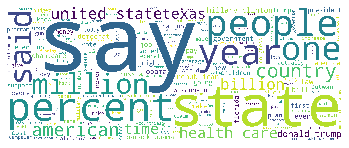

In [85]:
# all claims 
all_words = " ".join(df.claim)

# Wordcloud of claims
wordcloud = WordCloud(height=4000, width=10000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

As we can see from the above, most of the claims state some sort of fact often referencing other sources, as words such "say", "year", "percent", "million" are some of the more common ones. 

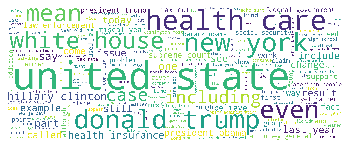

In [86]:
# all reference articles
all_words = " ".join(df.Combined)

# Wordcloud of combined articles
wordcloud = WordCloud(height=4000, width=10000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Compared to the claim column, there is much less dominance of single words in the combined reference article column. Some expected common words include United States itself, major issues such as "Health Care" and political personnel as "Donald Trump".

In [87]:
# One hot label encoding for claimant. 
claimant=df['claimant']
claimant_encoded=pd.get_dummies(claimant)
claimant_encoded.shape

(10593, 3104)

In [136]:
claimant_encoded.reset_index(drop=True, inplace=True)
claimant_encoded.shape

(10593, 3104)

In [89]:
# Converting dates to quarters to reduce future feature size
df['Qtr'] = pd.to_datetime(df['date'].values, format='%Y-%m').astype('period[Q]')

In [135]:
# One hot label encoding for date (Quarter)
dfqtr_encoded=pd.get_dummies(df['Qtr'])
dfqtr_encoded.reset_index(drop=True, inplace=True)
dfqtr_encoded.shape

(10593, 52)

In [91]:
# Creating a column which calculates the number of articles referenced for each entry
df['article_no']=df.related_articles.astype(str).str.count(",")+1

In [134]:
# One hot encoding of article_no
dfart_encoded=pd.get_dummies(df['article_no'])
dfart_encoded.reset_index(drop=True, inplace=True)
dfart_encoded.shape

(10593, 39)

### Data Exploration/Visualization

In [137]:
# Dataframe of all false news
df_0=df.loc[df['label'] == 0]
df_0.shape

(4374, 10)

In [138]:
#Dataframe of all partly true news
df_1=df.loc[df['label'] == 1]
df_1.shape

(5164, 10)

In [139]:
#Dataframe of all true news
df_2=df.loc[df['label'] == 2]
df_2.shape

(1055, 10)

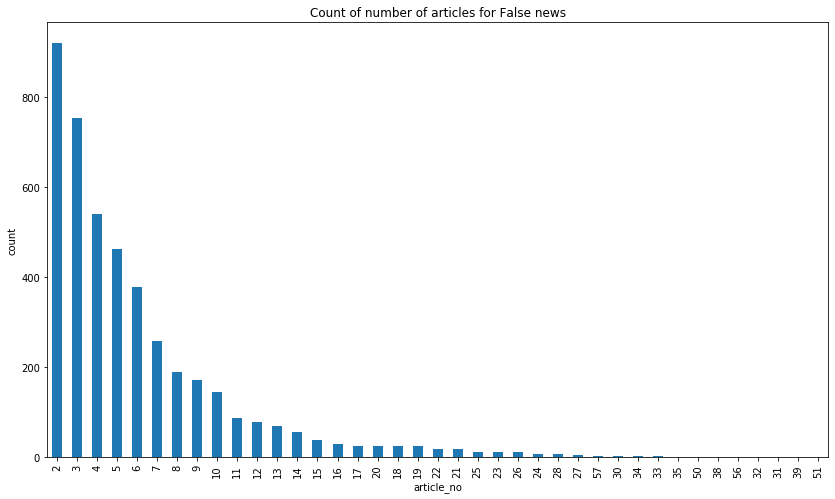

In [96]:
ax = df_0['article_no'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of number of articles for False news")
ax.set_xlabel("article_no")
ax.set_ylabel("count")
plt.show()

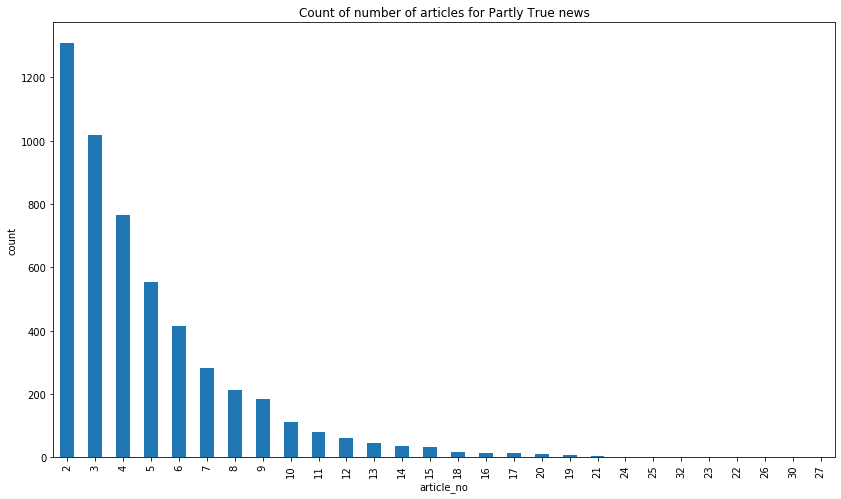

In [97]:
ax = df_1['article_no'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of number of articles for Partly True news")
ax.set_xlabel("article_no")
ax.set_ylabel("count")
plt.show()

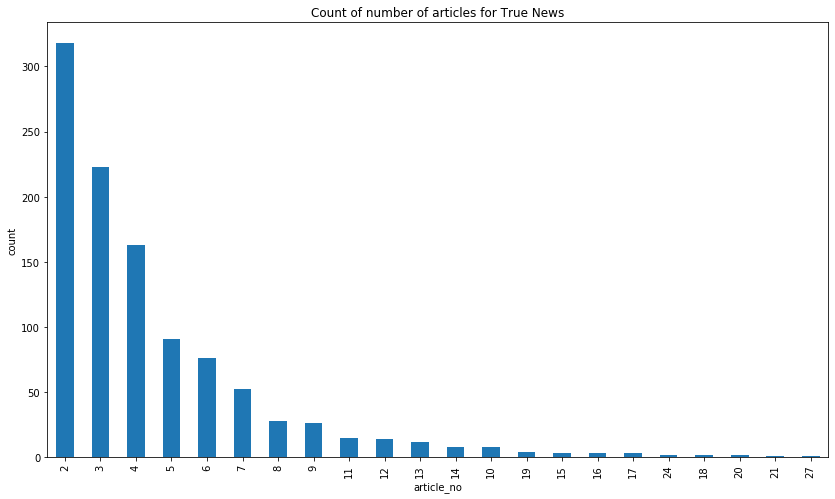

In [98]:
ax = df_2['article_no'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of number of articles for True News")
ax.set_xlabel("article_no")
ax.set_ylabel("count")
plt.show()

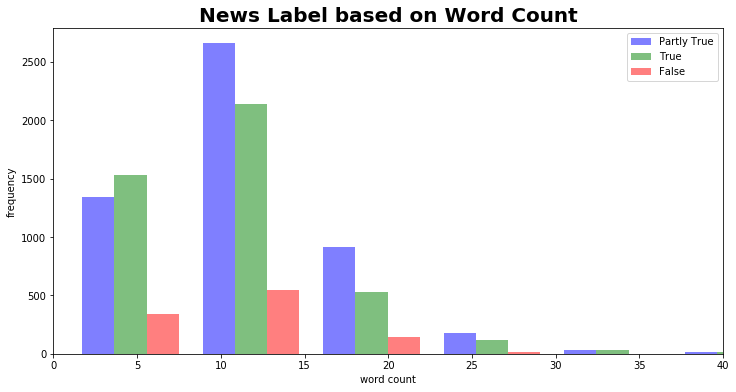

In [149]:
def word_count(sentence):
    return len(sentence.split())
df['word count'] = df['claim'].apply(word_count)
#plot word count distribution for both positive and negative sentiments
x = df['word count'][df['label'] == 1]
y = df['word count'][df['label'] == 0]
z = df['word count'][df['label'] == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,40)
plt.xlabel('word count')
plt.ylabel('frequency')
plt.title('News Label based on Word Count',fontsize=20,weight='bold')
g = plt.hist([x, y, z], color=['b','g','r'], alpha=0.5, label=['Partly True','True', 'False'])
plt.legend(loc='upper right')

[Text(0, 0, 'False News'),
 Text(0, 0, 'Party True News'),
 Text(0, 0, 'True News')]

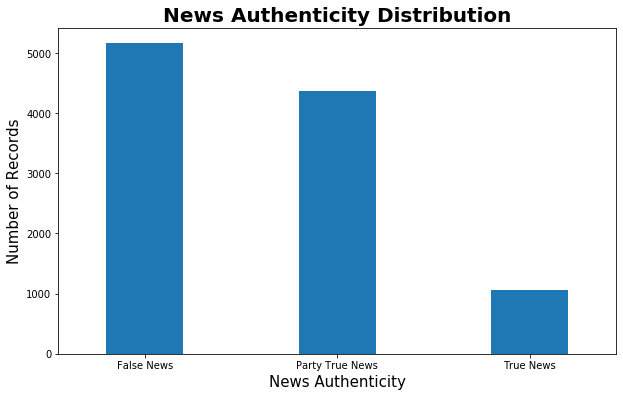

In [157]:
#Bar plot to visualize the distribution of cleaned data 
fig_1=df['label'].value_counts().plot(kind='bar',width=0.4,figsize=(10,6))
plt.xlabel('News Authenticity',fontsize=15)
plt.ylabel('Number of Records',fontsize=15)
plt.title('News Authenticity Distribution',fontsize=20,weight='bold')
labels = [item.get_text() for item in fig_1.get_xticklabels()]
labels[0] = 'False News'
labels[1] = 'Party True News'
labels[2] = 'True News'
fig_1.set_xticklabels(labels,rotation='horizontal')

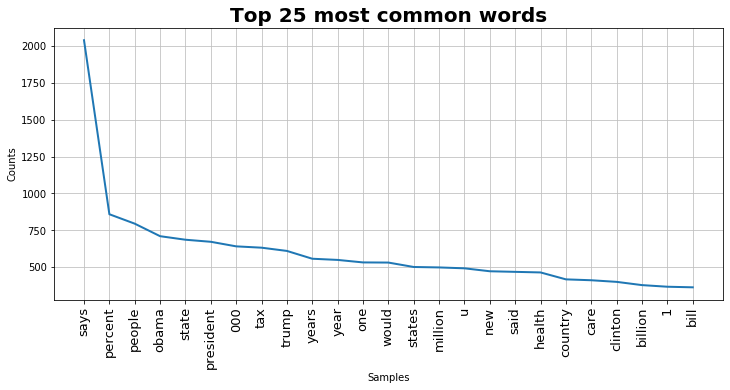

In [156]:
#Get most common words in training dataset
all_words = []
for line in list(df['claim']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        #Split sentences to get individual words
    
# Create a word frequency dictionary
wordfreq = Counter(all_words)

#Plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words',fontsize=20,weight='bold')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

### Model Implementation

In [99]:
# tokenize all the cleaned claims in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = df['claim'].apply(lambda x: x.split())
tokenized_tweet.head()

4    [comes, fighting, terrorism, another, thing, k...
5    [rhode, island, almost, dead, last, among, nor...
6    [poorest, counties, u, appalachia, happen, 90,...
8    [minnesota, michigan, iowa, already, 70, mph, ...
9    [fbi, uniform, crime, report, 2016, shows, fou...
Name: claim, dtype: object

In [100]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

4    [come, fight, terror, anoth, thing, know, work...
5    [rhode, island, almost, dead, last, among, nor...
6    [poorest, counti, u, appalachia, happen, 90, p...
8    [minnesota, michigan, iowa, alreadi, 70, mph, ...
9    [fbi, uniform, crime, report, 2016, show, four...
Name: claim, dtype: object

In [101]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['claim'])
print(tfidf)

  (0, 234)	0.39288101322624264
  (0, 385)	0.38433898683811474
  (0, 989)	0.3580476166910551
  (0, 994)	0.35111189074335103
  (0, 544)	0.2857149928057158
  (0, 1084)	0.3041601634454739
  (0, 127)	0.3719738249990458
  (0, 365)	0.36597733314713427
  (1, 520)	0.49770138111258677
  (1, 297)	0.45940247477041085
  (1, 947)	0.27991761613023297
  (1, 1003)	0.31421800797831284
  (1, 934)	0.4236649514889044
  (1, 763)	0.42972535640273585
  (2, 264)	0.5254603539389164
  (2, 448)	0.5285033147463913
  (2, 53)	0.4640245127728134
  (2, 722)	0.2771771024423438
  (2, 1076)	0.3904225507934768
  (3, 643)	0.5334923838254498
  (3, 633)	0.5334923838254498
  (3, 48)	0.46143333842637607
  (3, 56)	0.4667451413664284
  (4, 381)	0.3269605749451925
  (4, 278)	0.31704124153757257
  :	:
  (10588, 590)	0.2648086968032802
  (10588, 51)	0.25421387790366945
  (10588, 424)	0.27033646717335785
  (10588, 973)	0.29018925093644515
  (10588, 131)	0.256267031819675
  (10588, 31)	0.2971047529862
  (10588, 192)	0.281593648765872

In [102]:
# tokenize all the cleaned Combined articles in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = df['Combined'].apply(lambda x: x.split())
tokenized_tweet.head()

4    [remarks, counterterrorism, stanford, universi...
5    [lis, code, virginia, 18, 2, 10, prev, next, 1...
6    [counties, appalachia, alabama, bibb, blount, ...
8    [robin, vos, discusses, milwaukee, crime, spee...
9    [fbi, four, times, people, stabbed, death, kil...
Name: Combined, dtype: object

In [103]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

4    [remark, counterterror, stanford, univers, log...
5    [li, code, virginia, 18, 2, 10, prev, next, 18...
6    [counti, appalachia, alabama, bibb, blount, ca...
8    [robin, vo, discuss, milwauke, crime, speed, l...
9    [fbi, four, time, peopl, stab, death, kill, ri...
Name: Combined, dtype: object

In [104]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1800, stop_words='english')
# TF-IDF feature matrix
tfidf2 = tfidf_vectorizer.fit_transform(df['Combined'])
print(tfidf2)

  (0, 1543)	0.015526496027887885
  (0, 1896)	0.04327310870637819
  (0, 1760)	0.029726454606675036
  (0, 200)	0.10441308651317295
  (0, 1225)	0.016728398286438313
  (0, 1762)	0.034632221946958
  (0, 1055)	0.05910365177647567
  (0, 1937)	0.017238253887138403
  (0, 1970)	0.020638447370608156
  (0, 1824)	0.15045964527742328
  (0, 249)	0.07496013317944802
  (0, 888)	0.007594822576212721
  (0, 406)	0.013373665825399034
  (0, 1841)	0.07185955294139641
  (0, 1736)	0.026556455028765295
  (0, 689)	0.1151857507364533
  (0, 190)	0.09248356271057492
  (0, 1575)	0.007068864180469558
  (0, 986)	0.1971353047807111
  (0, 1725)	0.0067945519588095285
  (0, 1829)	0.049504992370952454
  (0, 1173)	0.047825732670316076
  (0, 1668)	0.020489009026560173
  (0, 507)	0.05888540966082406
  (0, 1314)	0.00897742047057181
  :	:
  (10592, 1765)	0.01360819502777221
  (10592, 663)	0.012722655510010528
  (10592, 521)	0.07194920648592537
  (10592, 617)	0.015895821920450033
  (10592, 667)	0.018914820785869296
  (10592, 730

In [140]:
tfidf = tfidf.todense()
tfidf = pd.DataFrame(tfidf)
tfidf.reset_index(drop=True, inplace=True)
tfidf

AttributeError: 'DataFrame' object has no attribute 'todense'

In [106]:
tfidf2 = tfidf2.todense()
tfidf2 = pd.DataFrame(tfidf2)
tfidf2.reset_index(drop=True, inplace=True)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.012138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.030747,0.045488,0.013769,0.008554,0.053691,0.018483,0.000000,0.000000
1,0.006720,0.007857,0.005639,0.006723,0.004996,0.002531,0.003228,0.005048,0.000000,0.007393,...,0.00000,0.000000,0.012716,0.045583,0.000000,0.000000,0.000000,0.000499,0.006955,0.002137
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.055343,0.000000,0.000000,0.000000,0.043488,0.000000,0.000000,0.000000
3,0.000000,0.015299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.019457,0.025836,0.013231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.011248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.009497,0.009727,0.000000,0.000000,0.014926,0.017128,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.011869,0.012156,0.015945,0.000000,0.000000,0.014270,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.079548,0.097770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.074757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.021041,0.118526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.023895,0.024928,0.000000,0.075069,0.071829,0.000000,0.037801,0.000000,...,0.00000,0.000000,0.008200,0.004199,0.000000,0.000000,0.012887,0.000000,0.000000,0.000000


In [107]:
# Combining dataframes
df_final = pd.concat([tfidf, claimant_encoded], axis=1, join='inner')
df_final.shape

(10593, 4204)

In [108]:
# Combining dataframes
df_final = pd.concat([df_final, dfqtr_encoded], axis=1, join='inner')
df_final = pd.concat([df_final, dfart_encoded], axis=1, join='inner')
df_final = pd.concat([df_final, tfidf2], axis=1, join='inner')
df_final.shape

(10593, 6295)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, df['label'], test_size = 0.3, random_state = 3, stratify=df['label'])

In [110]:
# Applying various Classification algorithms without doing variable reductions using bag of words
accuracy_scores = np.zeros(7)

# Support Vector Classifier
svm = SVC().fit(X_train, y_train)
prediction1 = svm.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))


# Logistic Regression
logis = LogisticRegression().fit(X_train, y_train)
prediction2 = logis.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction3 = knn.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Gaussian Naive Bayes
#clf = GaussianNB().fit(X_train, y_train)
#prediction4 = clf.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Gaussian Naive Bayes Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Decision Tree
#decision = DecisionTreeClassifier().fit(X_train, y_train)
#prediction4 = decision.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[3]))


# Random Forest
random = RandomForestClassifier().fit(X_train, y_train)
prediction5 = random.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[4]))

# Gradient Boosting
GB = GradientBoostingClassifier().fit(X_train, y_train)
prediction6 = GB.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[5]))

'''#XGBoosting
xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train, y_train)
prediction7 = xgb_model.predict(X_test)
accuracy_scores[6] = accuracy_score(y_test, prediction7)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[6]))
'''

Support Vector Classifier accuracy: 48.7413467589679%
Logistic Regression accuracy: 63.40465701699182%
K Nearest Neighbors Classifier accuracy: 57.457520453115166%
Random Forest Classifier accuracy: 56.733794839521714%
Gradient Boosting Classifier accuracy: 63.436123348017624%


"#XGBoosting\nxgb_model = xgb.XGBClassifier() \nxgb_model.fit(X_train, y_train)\nprediction7 = xgb_model.predict(X_test)\naccuracy_scores[6] = accuracy_score(y_test, prediction7)*100\nprint('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[6]))\n"

Text(0.5, 1.0, 'Accuracy of various algorithms with TFIDF')

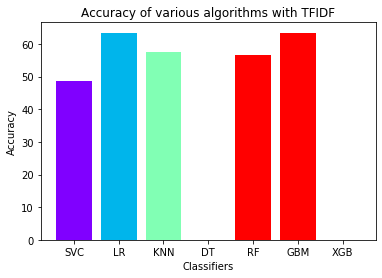

In [111]:
# Accuracy comparison of various algorithms for Tfidf
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN', 'DT', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms with TFIDF')

              precision    recall  f1-score   support

           0       0.67      0.62      0.65      1312
           1       0.62      0.76      0.68      1549
           2       0.35      0.04      0.08       317

    accuracy                           0.63      3178
   macro avg       0.55      0.48      0.47      3178
weighted avg       0.61      0.63      0.61      3178



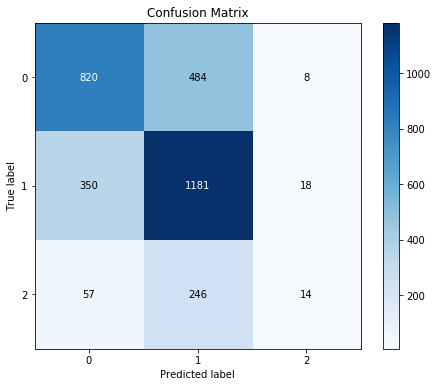

In [112]:
# check validation statistics (Classification Summary)
print(classification_report(y_test, prediction2)) # from confusion matrix Logistics Regression perform well
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, prediction2, figsize=(8, 6))
plt.show()

Based on the above, it is evident that "Partly True" and "True" news are often mis classified between themselves. Combining these two, would definitely massively improve the accuracy of the model. Another alternate would be filtering out all "opinions" and only modelling facts, which are more objective and less subjective to the decision of the person who classified the dataset initially.

### Hyperparameter Tuning

In [113]:
# taking logistic regression as the final model (stable and higher accuracy)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [114]:
#Logsitic Regression hyperparameter tuning
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.645718 using {'C': 0.1, 'dual': True, 'max_iter': 100}


In [115]:
# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_test)
accuracy_scores_logit_new = accuracy_score(y_test, prediction_logit_new)*100
print('Logistic Regression accuracy after hyperparameter tuning: {}%'.format(accuracy_scores_logit_new))

Logistic Regression accuracy after hyperparameter tuning: 64.15984896161108%


### SMOTE Example: Dealing with imbalanced dataset

In [118]:
!pip install imblearn

In [126]:
X_train.shape, y_train.shape
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(10292, 6295) (10292,)


In [125]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (7415, 6295)
Number transactions y_train dataset:  (7415,)
Number transactions X_test dataset:  (3178, 6295)
Number transactions y_test dataset:  (3178,)


In [124]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

After OverSampling, the shape of train_X: (10845, 6295)
After OverSampling, the shape of train_y: (10845,) 

After OverSampling, counts of label '1': 3615
After OverSampling, counts of label '0': 3615


In [129]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

After OverSampling, counts of label '1': 3615
After OverSampling, counts of label '0': 3615
After OverSampling, counts of label '2': 3615


Due to the interest of time, this new X train is not being implemented to check accuracy score. However, it is expected that accuracy (especially that of label =2) will be improved following SMOTE. As we can see above, the training data set is now balanced. 